In [ ]:
# Enhanced Personalized Learning Experiences by Leveraging Knowledge Graphs and Prompt Engineering
# Exploratory Data Analysis (EDA) Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all graphs look consistent
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

In [ ]:
##########################
# 1. Data Loading
##########################

stackoverflow_df = pd.read_csv("https://huggingface.co/datasets/MalavHNaik/skillbot/resolve/main/stackoverflow_full.csv")
big_student_df = pd.read_csv("https://huggingface.co/datasets/MalavHNaik/skillbot/resolve/main/big_student_mooc_24.csv")
all_job_post_df = pd.read_csv("https://huggingface.co/datasets/MalavHNaik/skillbot/resolve/main/all_job_post.csv")

/tmp/ipython-input-3449131079.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/tmp/ipython-input-3449131079.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(


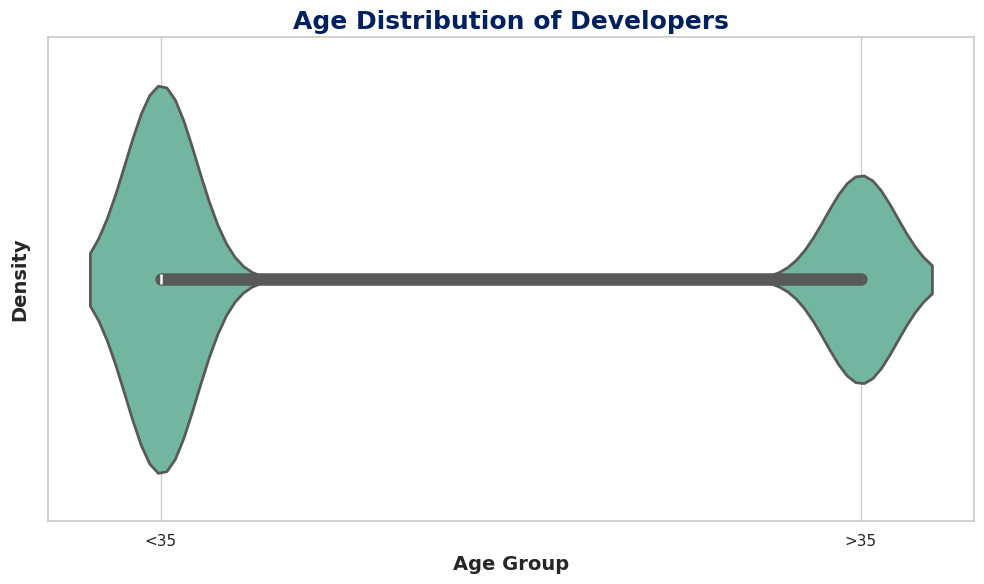

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.violinplot(
    x='Age',
    data=stackoverflow_df,
    palette="Set2",
    inner='box',
    linewidth=2,
    scale='count'
)
ax.set_title('Age Distribution of Developers', fontsize=18, fontweight='bold', color='#002060')
ax.set_xlabel('Age Group', fontsize=14, fontweight='semibold')
# Remove y-label for clarity in single-group violin plot
ax.set_ylabel('Density', fontsize=14, fontweight='semibold')
plt.tight_layout()
plt.show()


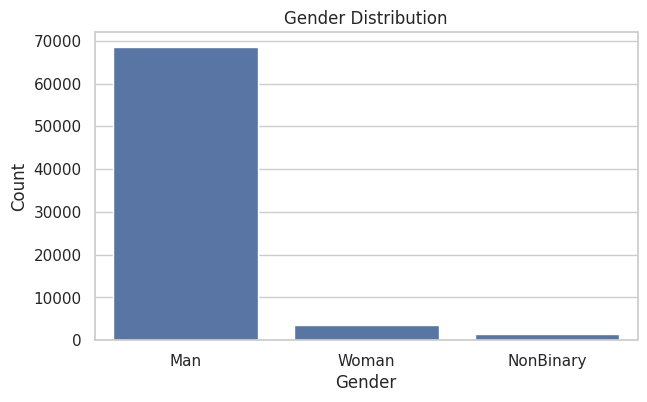

In [ ]:
# Gender Distribution
plt.figure(figsize=(7, 4))
sns.countplot(x='Gender', data=stackoverflow_df, order=stackoverflow_df['Gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
import plotly.express as px

top_countries = stackoverflow_df['Country'].value_counts().iloc[:20]
df_top_countries = top_countries.reset_index()
df_top_countries.columns = ['Country', 'Count']

fig = px.choropleth(
    df_top_countries,
    locations="Country",
    locationmode='country names',
    color="Count",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Top 20 Countries by Developer Count'
)
fig.update_layout(title_x=0.05, title_font=dict(size=24, color='#002060', family="Arial"))
fig.show()



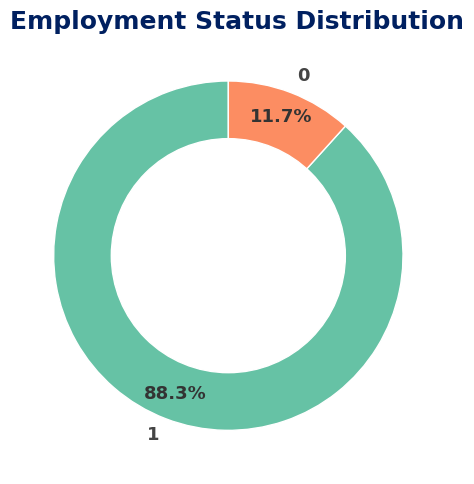

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


employment_counts = stackoverflow_df['Employment'].value_counts()
labels = employment_counts.index
sizes = employment_counts.values
colors = sns.color_palette("Set2", len(labels))

#  Donut Chart
fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    textprops={'fontsize': 13, 'weight': 'bold', 'color': '#333'}
)


centre_circle = plt.Circle((0,0),0.67,fc='white')
fig.gca().add_artist(centre_circle)

# Style enhancements
ax.set_title('Employment Status Distribution', fontsize=18, fontweight='bold', color='#002060', loc='left')
plt.tight_layout()

#
for t in texts:
    t.set_fontsize(13)
    t.set_fontweight('semibold')
    t.set_color('#444')

plt.show()


/tmp/ipython-input-3751543990.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




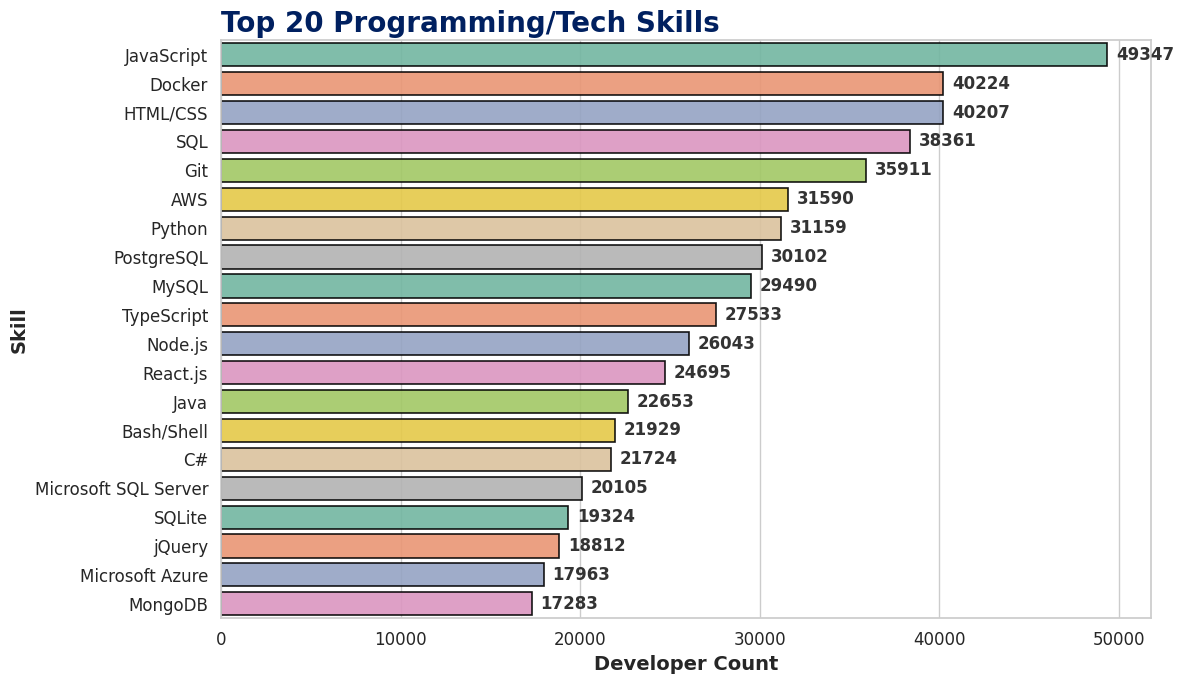

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data: split skill strings, clean, and count top 20
skills = stackoverflow_df['HaveWorkedWith'].str.split(";").explode().str.strip()
top_skills = skills.value_counts().head(20)

# Set up modern style
sns.set_theme(style="whitegrid")
colors = sns.color_palette("Set2", len(top_skills))

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=top_skills.values,
    y=top_skills.index,
    palette=colors,
    edgecolor='black',
    linewidth=1.2,
    alpha=0.9
)

# Annotate bars with counts
for i, v in enumerate(top_skills.values):
    ax.text(
        v + max(top_skills.values)*0.01,
        i, f"{v}",
        color='#333', fontweight='bold', va='center', fontsize=12
    )

# Stylize axes, title, and layout for corporate flair
ax.set_title('Top 20 Programming/Tech Skills', fontsize=20, fontweight='bold', color='#002060', loc='left')
ax.set_xlabel('Developer Count', fontsize=14, fontweight='semibold')
ax.set_ylabel('Skill', fontsize=14, fontweight='semibold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


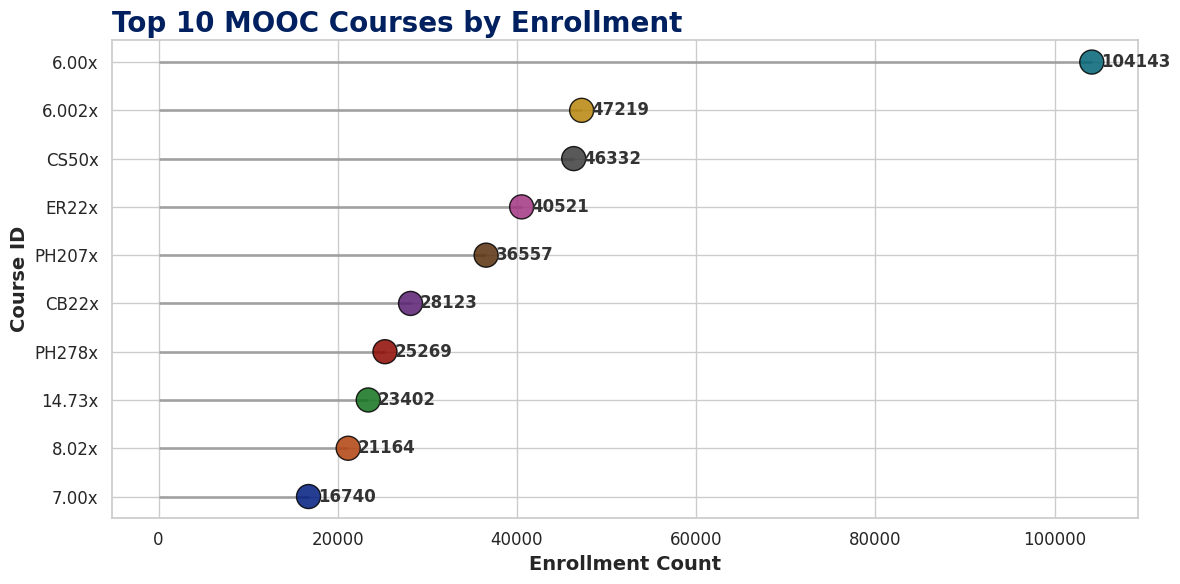

In [ ]:
##########################
# 3. Big Student MOOC EDA
##########################

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
top_courses = big_student_df['course_id'].value_counts().head(10)
courses = top_courses.index[::-1]  # Reverse for top-down order
enrollments = top_courses.values[::-1]


sns.set_theme(style="whitegrid")
colors = sns.color_palette("dark", len(courses))

plt.figure(figsize=(12, 6))
ax = plt.gca()

#  lollipop stems
ax.hlines(y=courses, xmin=0, xmax=enrollments, color="#969696", linewidth=2, alpha=0.8, zorder=1)

#  lollipop circles
ax.scatter(enrollments, courses, color=colors, s=300, edgecolor='black', zorder=2, alpha=0.85)

#
for x, y in zip(enrollments, courses):
    ax.text(x + max(enrollments)*0.01, y, f"{x}",
            va='center', ha='left', fontweight='bold', fontsize=12, color='#333')

#
ax.set_title('Top 10 MOOC Courses by Enrollment', fontsize=20, fontweight='bold', color='#002060', loc='left')
ax.set_xlabel('Enrollment Count', fontsize=14, fontweight='semibold')
ax.set_ylabel('Course ID', fontsize=14, fontweight='semibold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


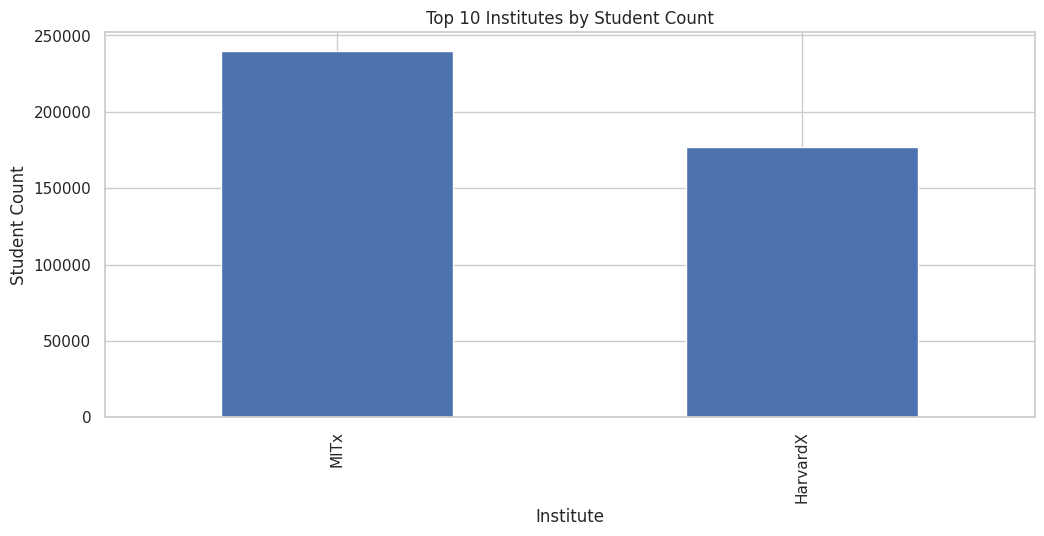

In [ ]:
# Top 10 Institutes
plt.figure(figsize=(12,5))
big_student_df['institute'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Institutes by Student Count')
plt.xlabel('Institute')
plt.ylabel('Student Count')
plt.show()

/tmp/ipython-input-2063148790.py:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




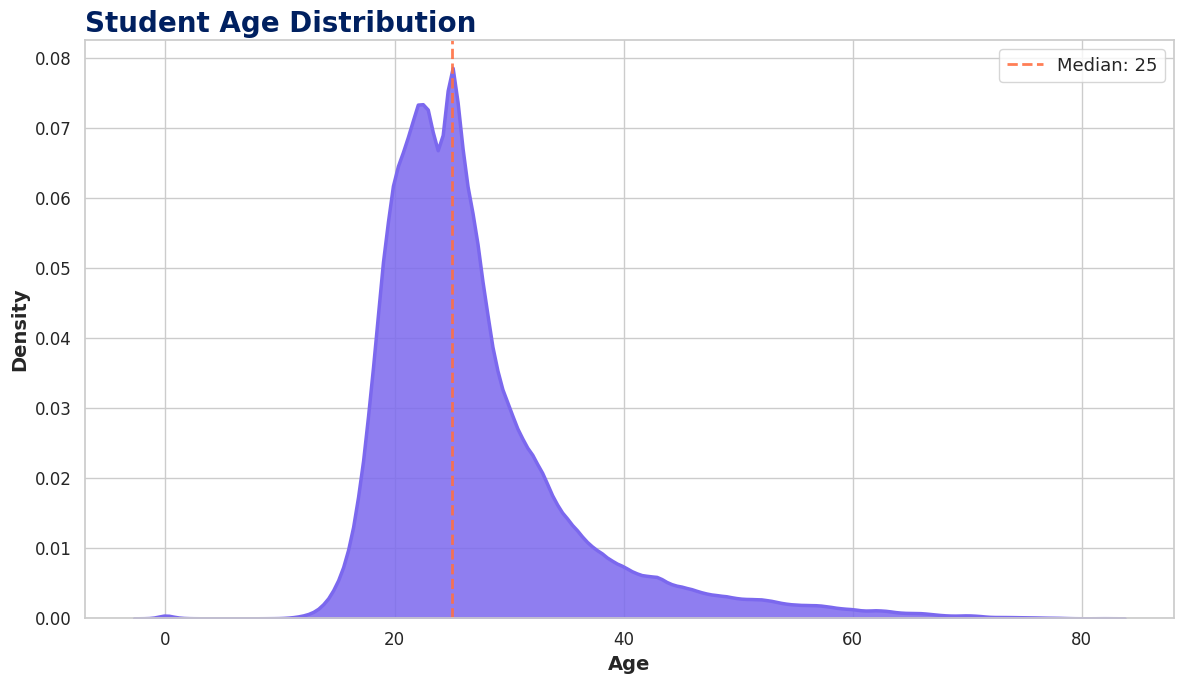

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# count ages and expand for density visualization
age_counts = big_student_df['age'].value_counts().sort_index()
age_expanded = []
for age, count in age_counts.items():
    age_expanded.extend([age]*count)
age_expanded = pd.Series(age_expanded)

#
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Continuous KDE (density plot) for a smoothed distribution
sns.kdeplot(
    age_expanded,
    shade=True,
    color="mediumslateblue",
    linewidth=2.5,
    alpha=0.85,
    bw_adjust=0.9,
    fill=True
)

#
median_age = age_expanded.median()
plt.axvline(median_age, color='#FF7043', linestyle='--', linewidth=2, alpha=0.9, label=f"Median: {int(median_age)}")

#
plt.title('Student Age Distribution', fontsize=20, fontweight='bold', color='#002060', loc='left')
plt.xlabel('Age', fontsize=14, fontweight='semibold')
plt.ylabel('Density', fontsize=14, fontweight='semibold')
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


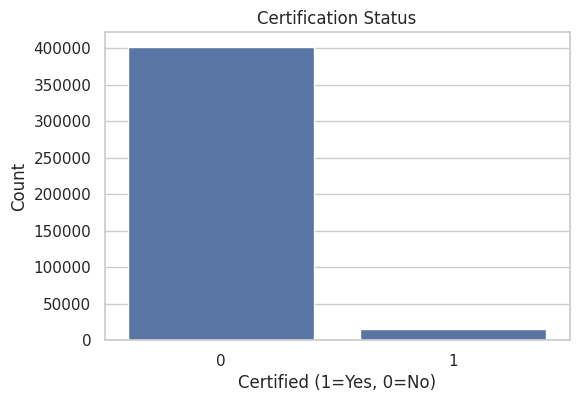

In [ ]:
# Certification Status Count
plt.figure(figsize=(6,4))
sns.countplot(x='certified', data=big_student_df)
plt.title('Certification Status')
plt.xlabel('Certified (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

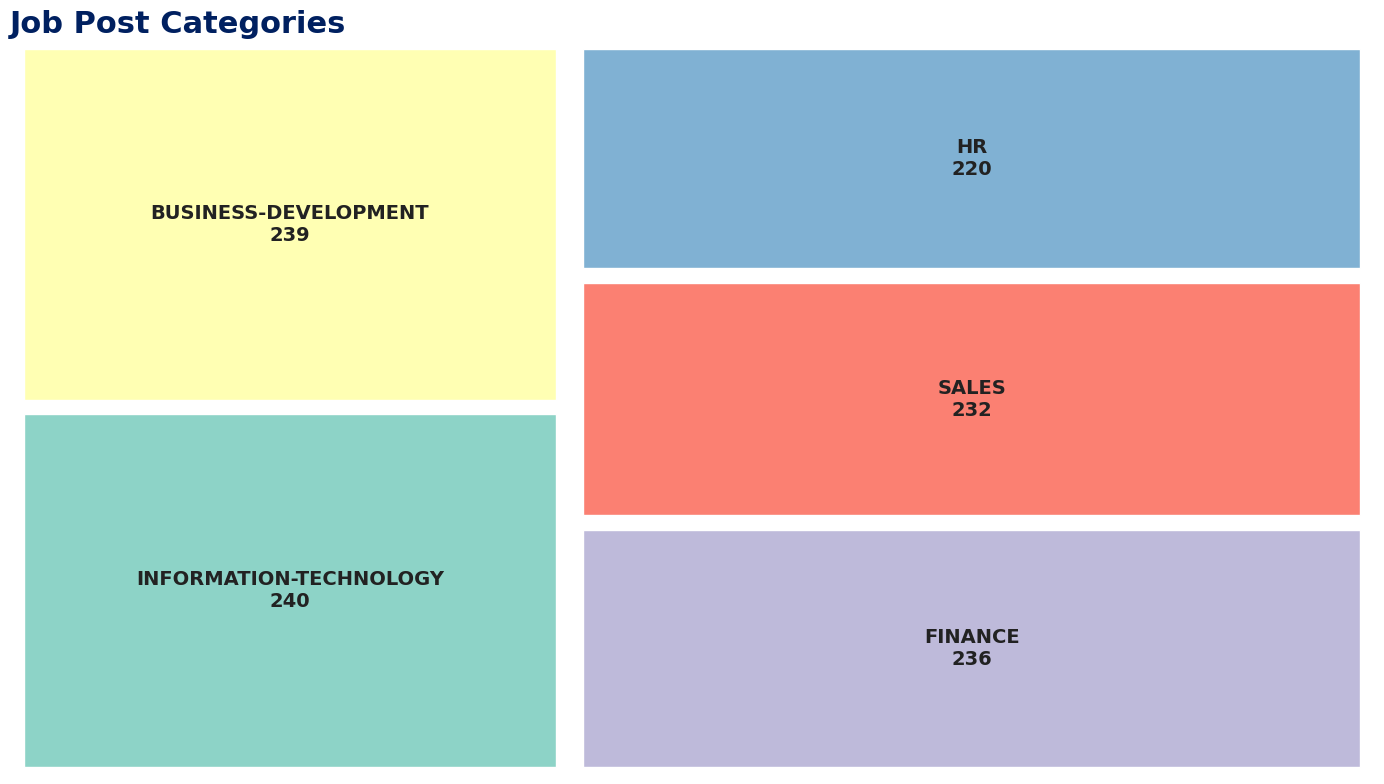

In [ ]:
##########################
# 4. Job Post Sample EDA
##########################
!pip install squarify
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import seaborn as sns

# data: group and count job categories
category_counts = all_job_post_df['category'].value_counts()
labels = [f"{cat}\n{count}" for cat, count in zip(category_counts.index, category_counts.values)]
sizes = category_counts.values
colors = sns.color_palette("Set3", len(labels))

plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    pad=True,
    text_kwargs={'fontsize':14, 'weight':'semibold', 'color':'#222'}
)

plt.title(
    'Job Post Categories',
    fontsize=22, fontweight='bold', color='#002060', loc='left'
)
plt.axis('off')
plt.tight_layout()
plt.show()


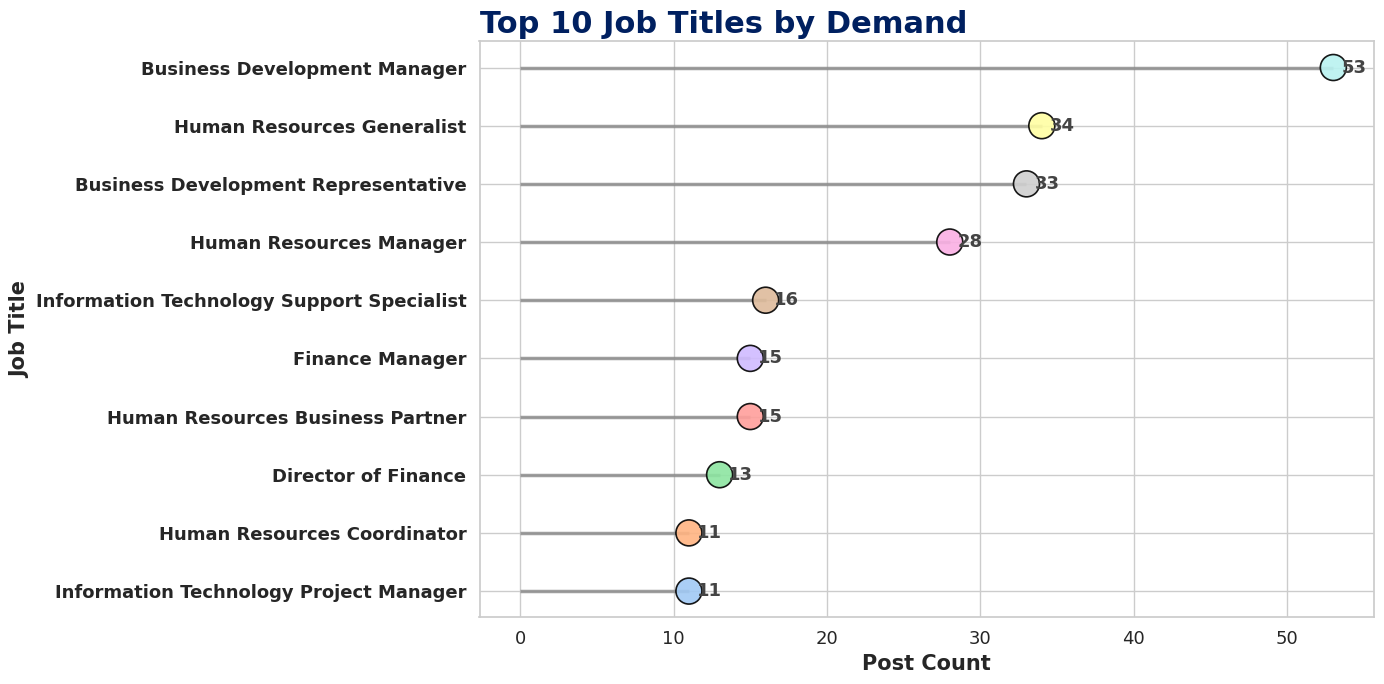

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# top 10 job titles by demand
top_jobs = all_job_post_df['job_title'].value_counts().head(10)
job_titles = top_jobs.index[::-1]  # Reverse for top-down order
counts = top_jobs.values[::-1]

sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel", len(job_titles))  # Clean, modern palette

plt.figure(figsize=(14, 7))
ax = plt.gca()

#
ax.hlines(y=job_titles, xmin=0, xmax=counts, color="#888", linewidth=2.5, alpha=0.8, zorder=1)

#
ax.scatter(counts, job_titles, color=colors, s=350, edgecolor='black', linewidth=1.2, zorder=2, alpha=0.9)

#
for x, y in zip(counts, job_titles):
    ax.text(x + max(counts)*0.01, y, f"{x}", va='center', ha='left', fontweight='bold', fontsize=13, color='#444')

#
ax.set_title('Top 10 Job Titles by Demand', fontsize=22, fontweight='bold', color='#002060', loc='left')
ax.set_xlabel('Post Count', fontsize=15, fontweight='semibold')
ax.set_ylabel('Job Title', fontsize=15, fontweight='semibold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13, weight='semibold')
plt.tight_layout()
plt.show()


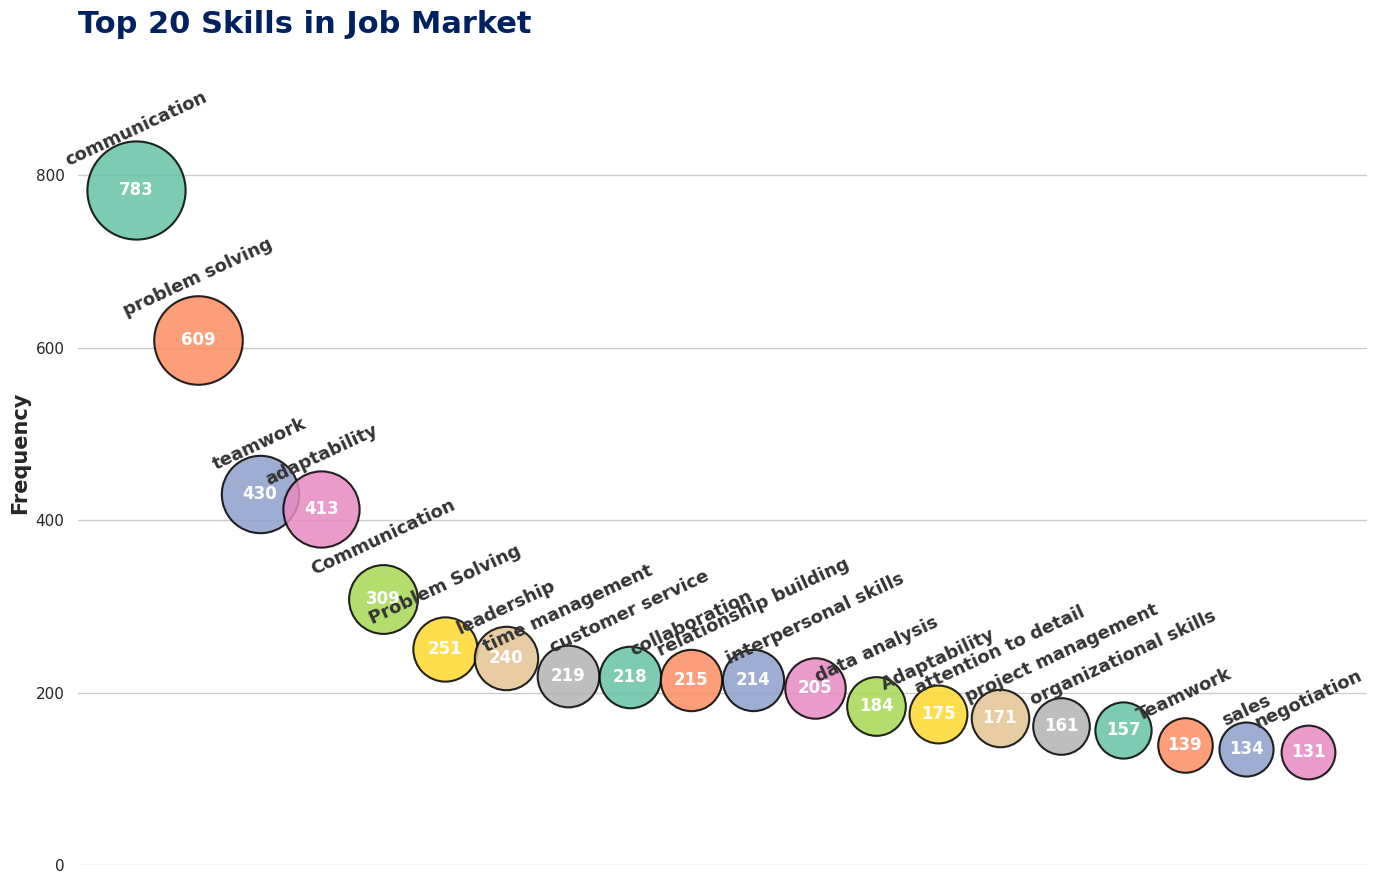

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
skills_job = all_job_post_df['job_skill_set'].str.strip("[]'").str.replace("'", "").str.split(',').explode().str.strip()
top_skills = skills_job.value_counts().head(20)
skills = top_skills.index
counts = top_skills.values

# Normalize bubble sizes
sizes = (counts - counts.min()) / (counts.max() - counts.min()) * 3500 + 1500

#
colors = sns.color_palette("Set2", len(skills))

plt.figure(figsize=(14,9))
ax = plt.gca()

# Plot bubbles
for i, (skill, count) in enumerate(zip(skills, counts)):
    ax.scatter(
        i, count,
        s=sizes[i],
        color=colors[i],
        alpha=0.85,
        edgecolor='black',
        linewidth=1.5,
        zorder=3
    )
    #
    ax.text(i, count + max(counts)*0.03, skill, ha='center', va='bottom',
            fontsize=13, fontweight='semibold', color='#333', rotation=25)
    ax.text(i, count, f"{count}", ha='center', va='center',
            fontsize=12, fontweight='bold', color='white')

#
ax.set_title('Top 20 Skills in Job Market', fontsize=22, fontweight='bold', color='#002060', loc='left')
ax.set_xlabel('')
ax.set_ylabel('Frequency', fontsize=15, fontweight='semibold')
ax.set_xticks([])  # Hide x labels (skills are annotated on bubbles)
ax.set_ylim(0, max(counts)*1.22)
plt.tight_layout()
sns.despine(left=True, bottom=True)

plt.show()


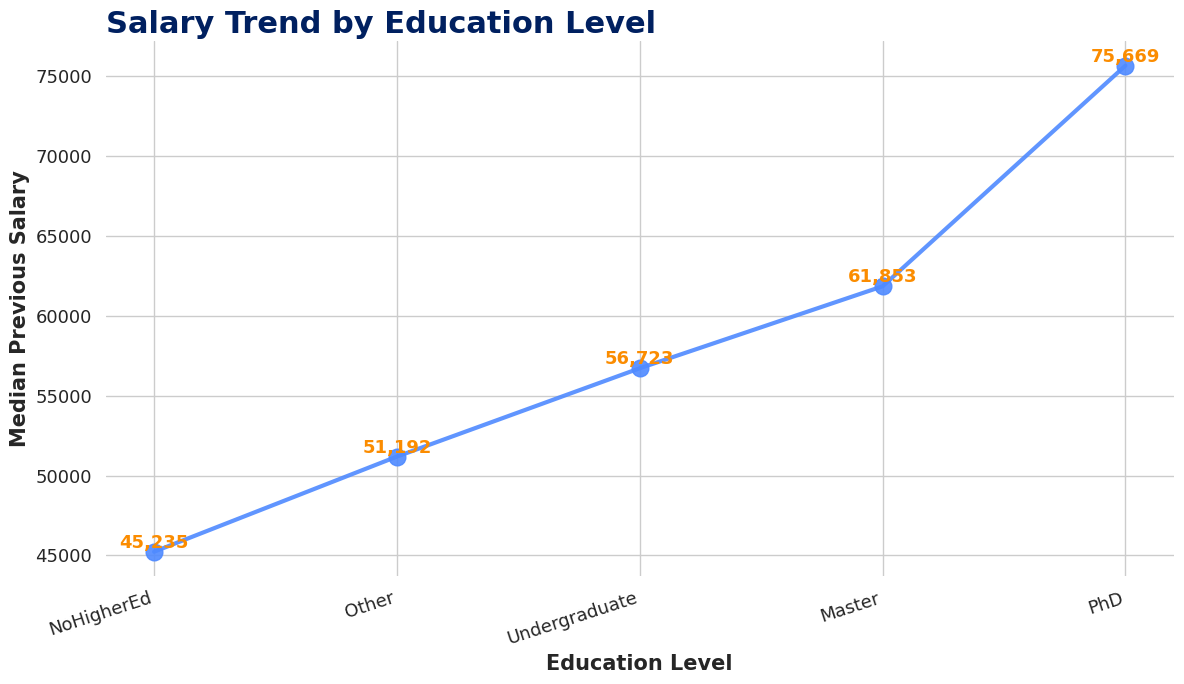

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate median (or mean) salary for each top education level
top_levels = stackoverflow_df['EdLevel'].value_counts().head(8).index
medians = stackoverflow_df[stackoverflow_df['EdLevel'].isin(top_levels)].groupby('EdLevel')['PreviousSalary'].median()
medians = medians.sort_values()  # Order by median for a logical slope

# slope chart
plt.figure(figsize=(12, 7))
levels = medians.index
salaries = medians.values

#
plt.plot(levels, salaries, color="#4F8AFF", linewidth=3, marker='o', markersize=12, alpha=0.9)

# dot with the salary
for i, (ed, sal) in enumerate(zip(levels, salaries)):
    plt.text(i, sal, f"{int(sal):,}", ha='center', va='bottom', fontweight='bold', fontsize=13, color='#FB8C00')

#
plt.title('Salary Trend by Education Level', fontsize=22, fontweight='bold', color='#002060', loc='left')
plt.ylabel('Median Previous Salary', fontsize=15, fontweight='semibold')
plt.xlabel('Education Level', fontsize=15, fontweight='semibold')
plt.xticks(fontsize=13, rotation=18, ha='right')
plt.yticks(fontsize=13)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


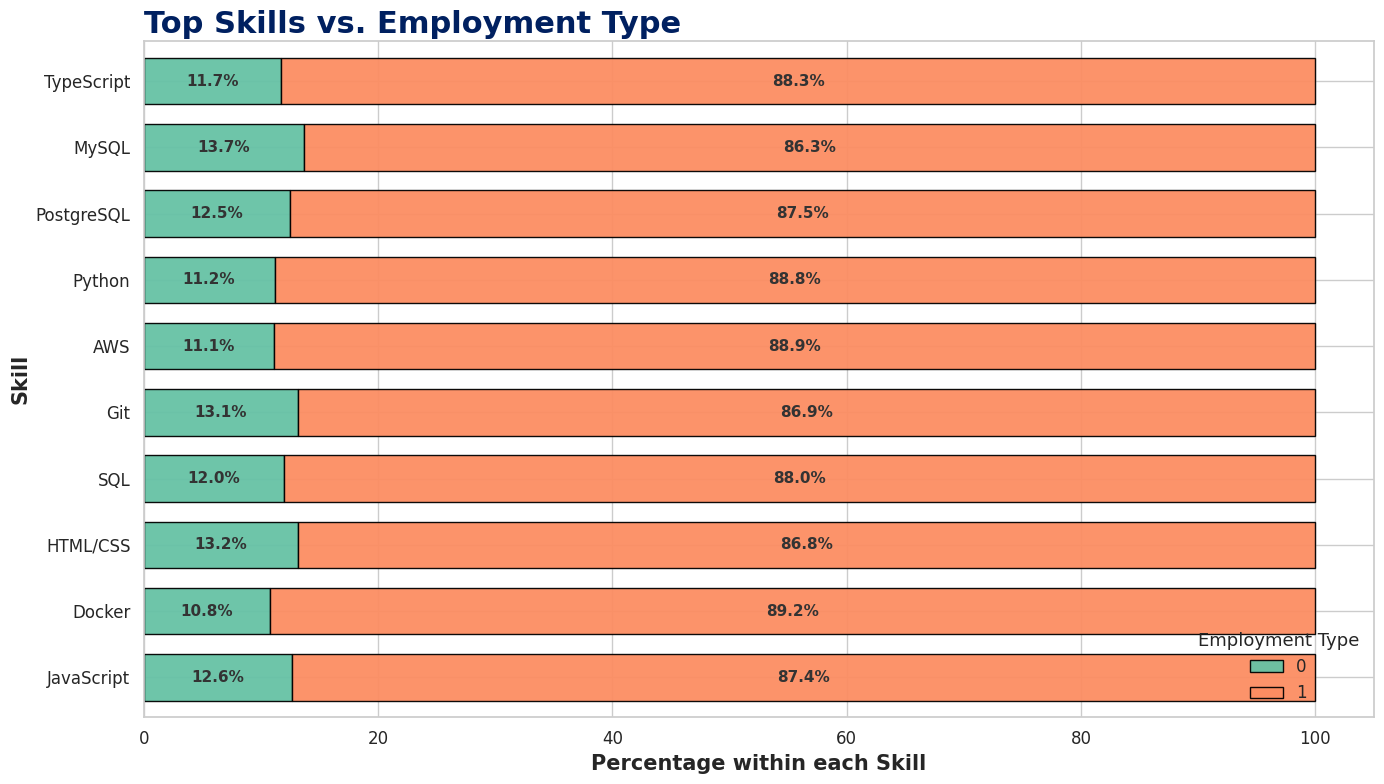

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#
skills = stackoverflow_df['HaveWorkedWith'].str.split(';').explode().str.strip()
skill_counts = skills.value_counts().head(10).index

tmp = stackoverflow_df[['HaveWorkedWith', 'Employment']].dropna()
tmp = tmp.assign(Skill=tmp['HaveWorkedWith'].str.split(';')).explode('Skill')
tmp['Skill'] = tmp['Skill'].str.strip()
tmp = tmp[tmp['Skill'].isin(skill_counts)]

# counts for each Skill and Employment type
pivot_df = tmp.groupby(['Skill', 'Employment']).size().unstack(fill_value=0)
pivot_df = pivot_df.loc[skill_counts]  # Maintain skill ranking

#
pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

#
employment_types = pivot_df.columns
colors = sns.color_palette("Set2", len(employment_types))

# Plot
pivot_pct.plot(
    kind='barh',
    stacked=True,
    color=colors,
    figsize=(14, 8),
    edgecolor='black',
    alpha=0.95,
    width=0.7
)

plt.title('Top Skills vs. Employment Type', fontsize=22, fontweight='bold', color='#002060', loc='left')
plt.xlabel('Percentage within each Skill', fontsize=15, fontweight='semibold')
plt.ylabel('Skill', fontsize=15, fontweight='semibold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Employment Type', fontsize=12, title_fontsize=13, frameon=False, loc='lower right')

#
for idx, skill in enumerate(pivot_pct.index):
    cum_left = 0
    for jdx, emp in enumerate(employment_types):
        width = pivot_pct.loc[skill, emp]
        if width > 5:
            plt.text(cum_left + width/2, idx, f"{width:.1f}%", ha="center", va="center", fontsize=11, weight="bold", color='#333')
        cum_left += width

plt.tight_layout()
plt.show()


/tmp/ipython-input-3833398202.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3833398202.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



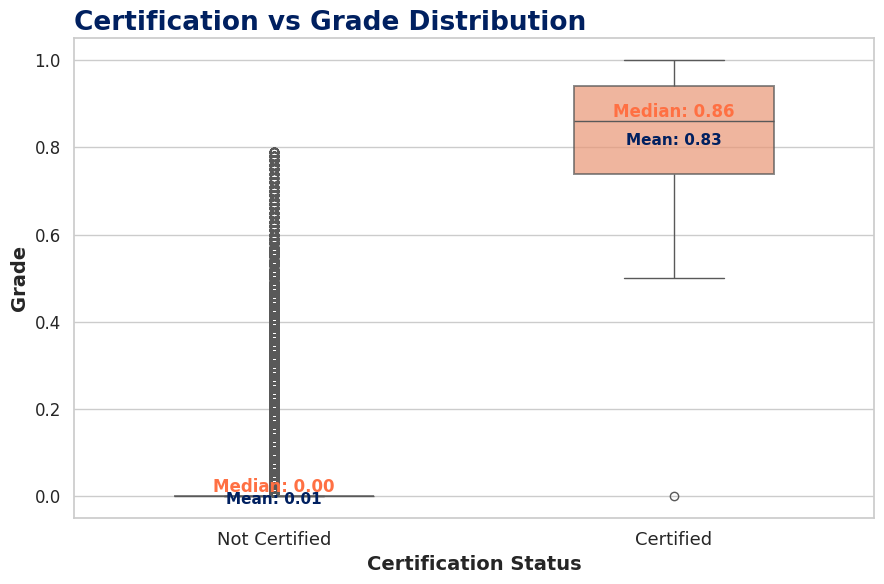

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6))

#
ax = sns.boxplot(
    x='certified',
    y='grade',
    data=big_student_df,
    palette="Set2",
    width=0.5,
    showfliers=True,
    boxprops=dict(alpha=0.7, linewidth=1.4)
)

#
ax.set_xticklabels(['Not Certified', 'Certified'], fontsize=13)

#
grouped = big_student_df.groupby('certified')['grade']
for i, label in enumerate(['Not Certified', 'Certified']):
    vals = big_student_df[big_student_df['certified'] == i]['grade']
    median_val = vals.median()
    mean_val = vals.mean()
    #
    ax.text(i, median_val, f'Median: {median_val:.2f}', ha='center', va='bottom',
            fontweight='bold', fontsize=12, color='#FF7043')
    #
    ax.text(i, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='top',
            fontweight='semibold', fontsize=11, color='#002060')

plt.title('Certification vs Grade Distribution', fontsize=19, fontweight='bold', color='#002060', loc='left')
plt.xlabel('Certification Status', fontsize=14, fontweight='semibold')
plt.ylabel('Grade', fontsize=14, fontweight='semibold')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


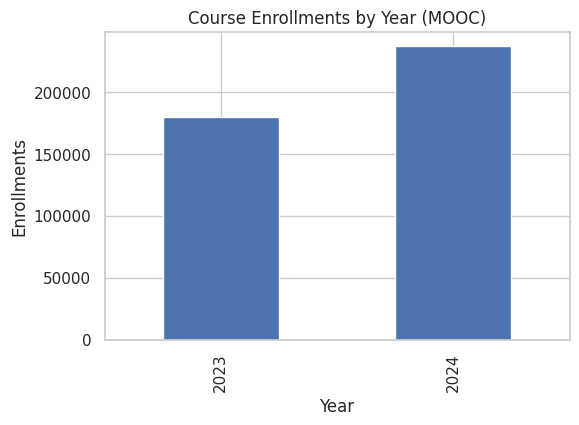

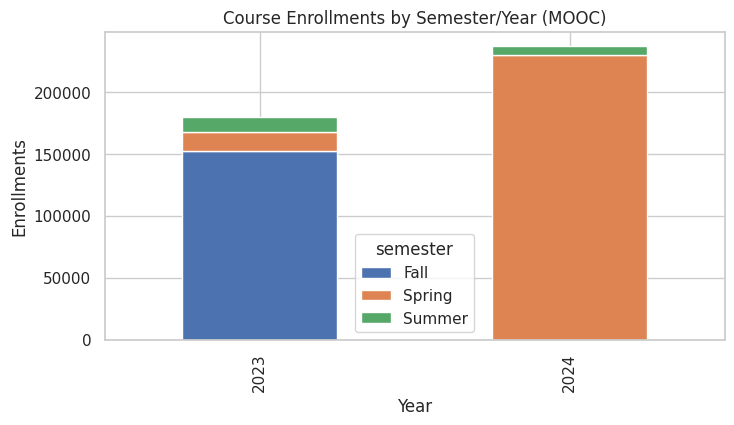

In [ ]:
#
plt.figure(figsize=(6,4))
big_student_df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Course Enrollments by Year (MOOC)")
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.show()

#
sem_trends = big_student_df.groupby(['year', 'semester']).size().unstack(fill_value=0)
sem_trends.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title("Course Enrollments by Semester/Year (MOOC)")
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.show()


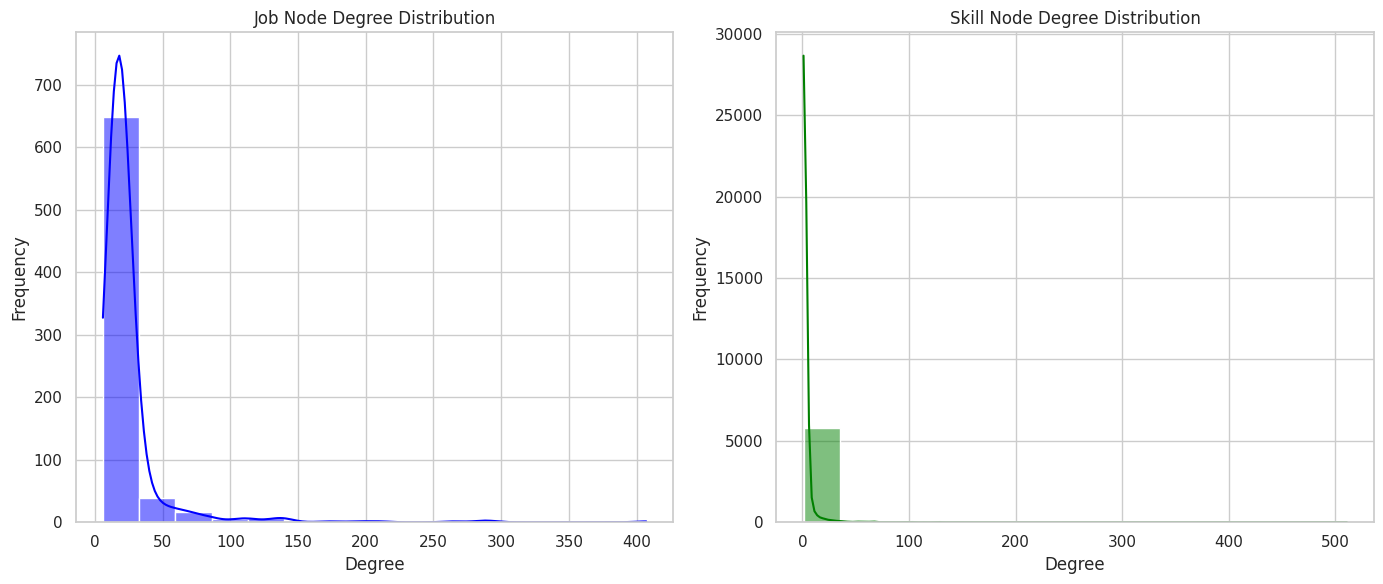

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

#
G = nx.Graph()
for _, row in all_job_post_df.iterrows():
    job = row['job_title']
    skill_list = [s.strip() for s in str(row['job_skill_set']).strip("[]").replace("'", "").split(',') if s.strip()]
    for skill in skill_list:
        G.add_node(job, bipartite='job')
        G.add_node(skill, bipartite='skill')
        G.add_edge(job, skill)

job_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'job']
skill_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'skill']
job_degrees = [G.degree(n) for n in job_nodes]
skill_degrees = [G.degree(n) for n in skill_nodes]

#
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#
sns.histplot(job_degrees, bins=15, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Job Node Degree Distribution")
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Frequency")

#
sns.histplot(skill_degrees, bins=15, kde=True, color="green", ax=axes[1])
axes[1].set_title("Skill Node Degree Distribution")
axes[1].set_xlabel("Degree")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


StackOverflow missing values (%):
 HaveWorkedWith    0.085759
Age               0.000000
Unnamed: 0        0.000000
EdLevel           0.000000
Employment        0.000000
Gender            0.000000
Accessibility     0.000000
MentalHealth      0.000000
MainBranch        0.000000
YearsCodePro      0.000000
YearsCode         0.000000
Country           0.000000
PreviousSalary    0.000000
ComputerSkills    0.000000
Employed          0.000000
dtype: float64
Student MOOC missing values (%):
 gender               5.567242
Id                   0.000000
course_id            0.000000
year                 0.000000
semester             0.000000
institute            0.000000
userid_DI            0.000000
viewed               0.000000
certified            0.000000
explored             0.000000
final_cc_cname_DI    0.000000
LoE_DI               0.000000
grade                0.000000
start_time_DI        0.000000
last_event_DI        0.000000
nevents              0.000000
ndays_act            0.000000
n

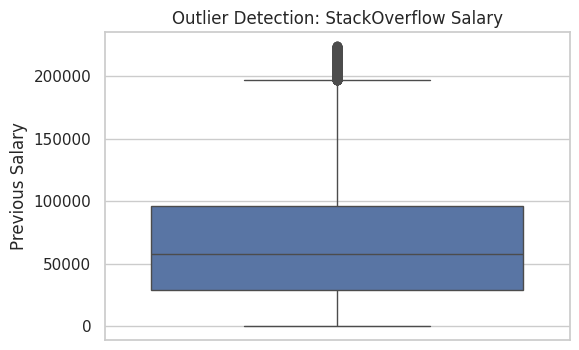

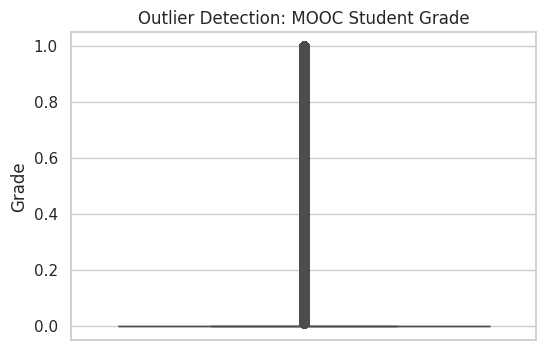

In [ ]:
#
print("StackOverflow missing values (%):\n", stackoverflow_df.isnull().mean().sort_values(ascending=False)*100)
print("Student MOOC missing values (%):\n", big_student_df.isnull().mean().sort_values(ascending=False)*100)
print("Job Posts missing values (%):\n", all_job_post_df.isnull().mean().sort_values(ascending=False)*100)

#
plt.figure(figsize=(6,4))
sns.boxplot(y=stackoverflow_df['PreviousSalary'].dropna())
plt.title("Outlier Detection: StackOverflow Salary")
plt.ylabel("Previous Salary")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=big_student_df['grade'].dropna())
plt.title("Outlier Detection: MOOC Student Grade")
plt.ylabel("Grade")
plt.show()


/tmp/ipython-input-1282879938.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




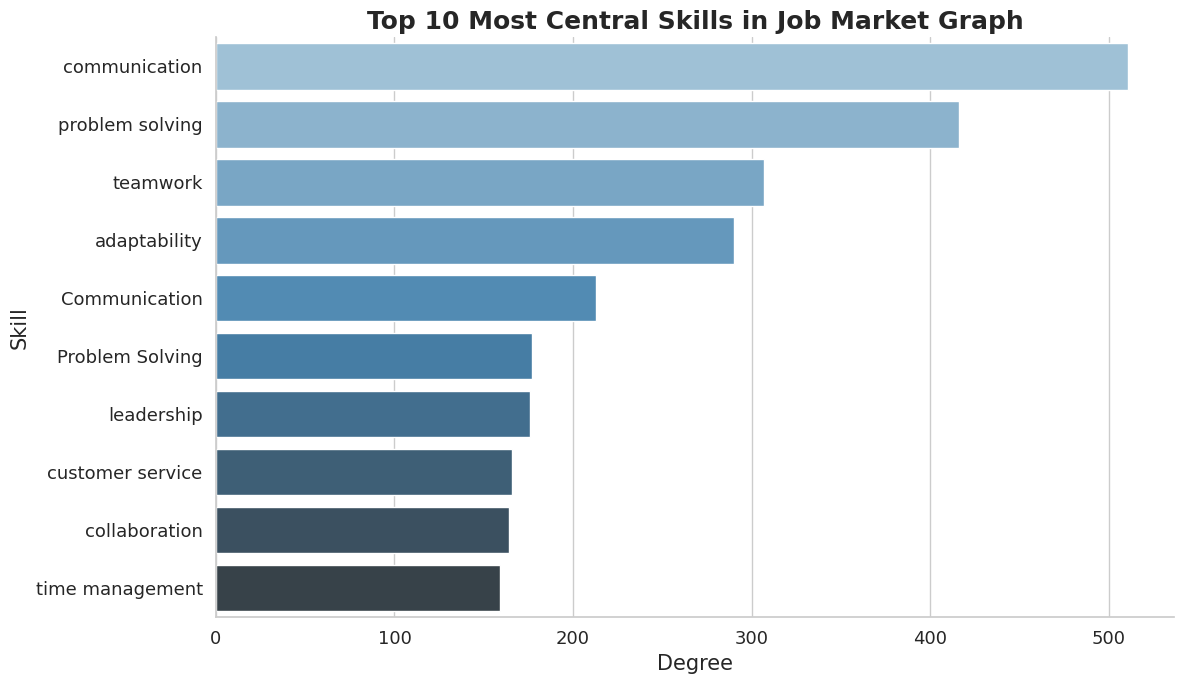

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

# Calculate skill degrees
skill_degrees = G.degree(skill_nodes)
top_skills = sorted(skill_degrees, key=itemgetter(1), reverse=True)[:10]
skill_names = [s[0] for s in top_skills]
skill_values = [s[1] for s in top_skills]

#
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

#
sns.barplot(x=skill_values, y=skill_names, palette="Blues_d")
plt.title('Top 10 Most Central Skills in Job Market Graph', fontsize=18, fontweight='bold')
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Skill', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
sns.despine()
plt.show()


In [ ]:
# Coverage: How many unique skills appear across all job posts or students
print("Unique job market skills:", skills_job.nunique())
if 'ComputerSkills' in stackoverflow_df.columns:
    dev_skills_full = stackoverflow_df['ComputerSkills'].str.split(';').explode().str.strip()
    print("Unique developer skills:", dev_skills_full.nunique())


Unique job market skills: 5840
Unique developer skills: 73


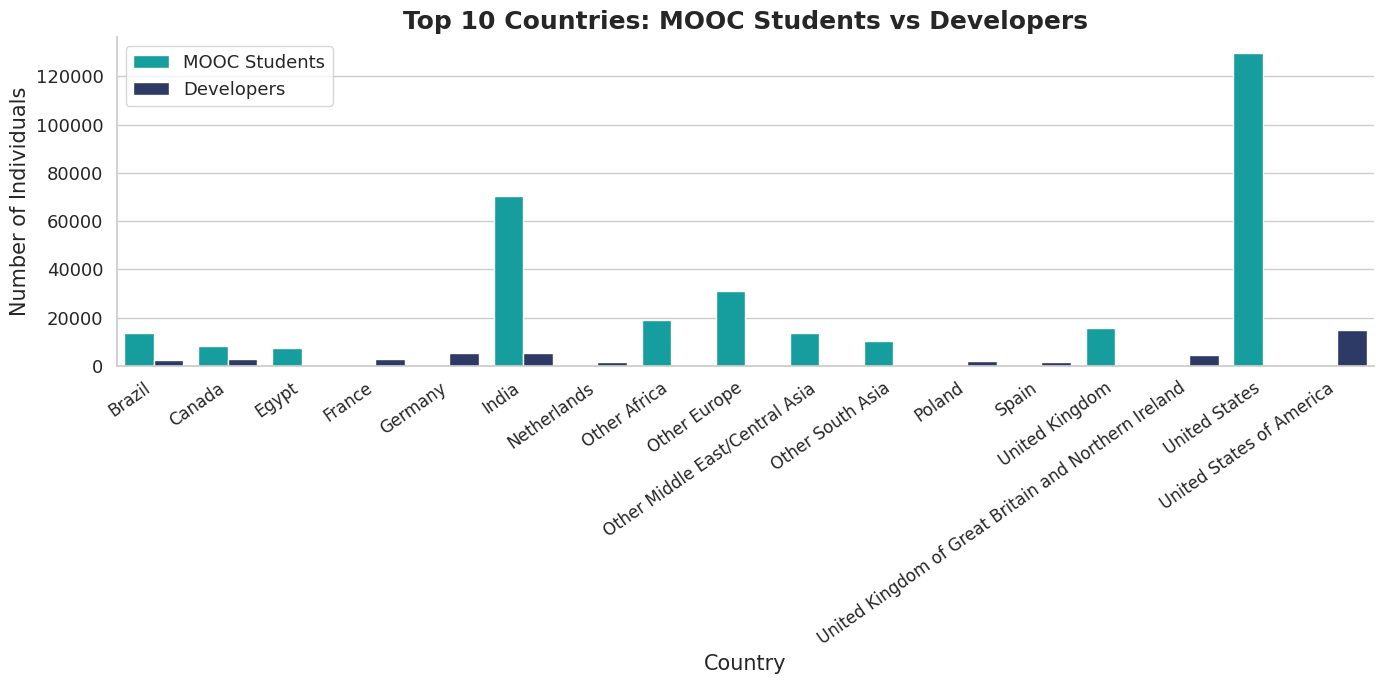

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare value counts
mooc_counts = big_student_df['final_cc_cname_DI'].value_counts().head(10)
dev_counts = stackoverflow_df['Country'].value_counts().head(10)

# Use .union for Index objects to avoid TypeError
top_countries = list(pd.Index(mooc_counts.index).union(pd.Index(dev_counts.index)))

# Align both series
mooc_aligned = mooc_counts.reindex(top_countries, fill_value=0)
dev_aligned = dev_counts.reindex(top_countries, fill_value=0)

cross_df = pd.DataFrame({
    'Country': top_countries,
    'MOOC Students': mooc_aligned.values,
    'Developers': dev_aligned.values
})

melted = cross_df.melt(id_vars='Country', var_name='Group', value_name='Count')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
bar_palette = ['#00b3b3', '#22356F']

ax = sns.barplot(
    data=melted,
    x='Country', y='Count', hue='Group',
    palette=bar_palette
)

ax.set_title('Top 10 Countries: MOOC Students vs Developers', fontsize=18, fontweight='bold')
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Number of Individuals', fontsize=15)
ax.legend(title='', fontsize=13)
plt.xticks(fontsize=12, rotation=35, ha='right')
plt.yticks(fontsize=13)
plt.tight_layout()
sns.despine()

plt.show()
